In [1]:
import pandas as pd
df = pd.read_excel('E:\坚果云同步文件\江梓烨\供应链调查与分析\数据\各品牌汽车销售数据.xlsx')
df.head()

,品牌,2024,2023,2022,2021,2020,合计
0,比亚迪,3489908,2391555,1583025,525711,144149,8505805
1,吉利汽车,1048619,911563,813357,1051807,1007151,5040946
2,长安,827428,960285,844763,868710,807091,4429216
3,奇瑞,545463,392940,287115,326232,247243,1894019
4,特斯拉,661276,610692,441697,322562,147445,2246719


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_37664\2479384587.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


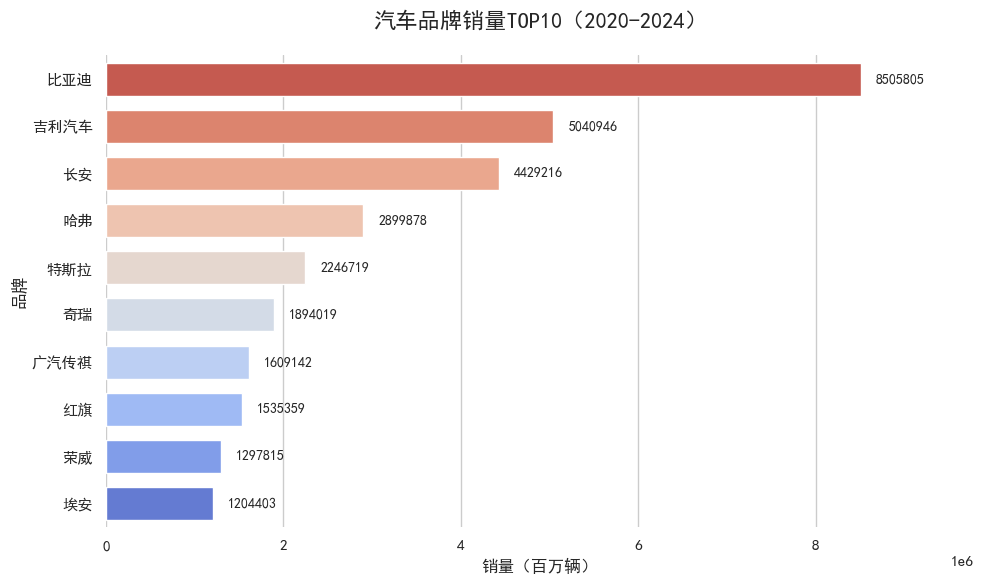

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# 1. 主题与样式设置
sns.set_theme(
    style="whitegrid",
    rc={
        'font.sans-serif': ['SimHei'],
        'axes.unicode_minus': False,
        'axes.linewidth': 1.5
    }
)
# 2. 数据处理（按合计降序取前10）
top_brands = df.sort_values('合计', ascending=False).head(10)
# 3. 创建横向条形图
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='合计',
    y='品牌',
    data=top_brands,
    palette="coolwarm_r",  # 横向图建议使用_r反转色板
    saturation=0.8,
    width=0.7,
    orient='h'            # 关键参数
)
# 4. 添加数据标签
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + max(top_brands['合计'])*0.02,  # 动态偏移量
        p.get_y() + p.get_height()/2,
        f"{int(width)}",
        va='center',
        fontsize=10
    )
# 5. 图表美化
plt.title('汽车品牌销量TOP10（2020-2024）', fontsize=16, pad=20)
plt.xlabel('销量（百万辆）', fontsize=12)
plt.ylabel('品牌', fontsize=12)
plt.xlim(0, max(top_brands['合计'])*1.15)  # 扩展X轴范围
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

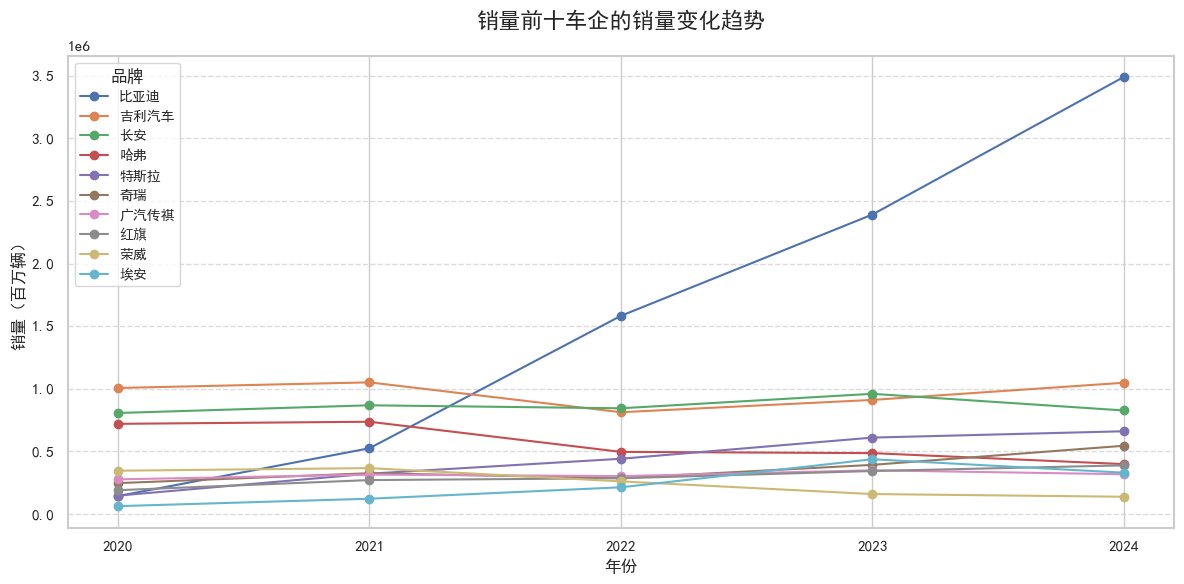

In [3]:
# 提取销量前十车企的年份数据
years = ['2020', '2021', '2022', '2023', '2024']
top_brands.columns = top_brands.columns.astype(str)  # 将列名转换为字符串
top_brands_time_series = top_brands[['品牌'] + years].set_index('品牌').T

# 绘制折线图
plt.figure(figsize=(12, 6))
for brand in top_brands_time_series.columns:
    plt.plot(top_brands_time_series.index, top_brands_time_series[brand], marker='o', label=brand)

# 图表美化
plt.title('销量前十车企的销量变化趋势', fontsize=16, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('销量（百万辆）', fontsize=12)
plt.legend(title='品牌', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()